<a href="https://colab.research.google.com/github/Tzoll87/Stock/blob/master/Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install mplfinance

     |████████████████████████████████| 71kB 4.2MB/s 


In [ ]:
pip install yfinance

     |████████████████████████████████| 5.5MB 17.8MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=c83e264e28df7c70843bae4227f83cdbfb52c8066487c094b98a6730504ab855
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
pip install fix_yahoo_finance

In [ ]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
import pandas_datareader.data as web
import matplotlib.dates as mdates
import mplfinance as mpf
import bs4 as bs
import pickle
import requests
import datetime as dt
import os # create new directories
import fix_yahoo_finance as yf

yf.pdr_override()

In [ ]:
style.use('ggplot')

In [ ]:
start = dt.datetime(2020,1,1)
end = dt.datetime(2021,4,16)

In [ ]:
df = web.DataReader('VIAC', data_source='yahoo', start = start, end = end)

In [ ]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,42.349998,41.759998,42.209999,42.090000,5738100.0,40.318981
2020-01-03,41.759998,41.070000,41.730000,41.450001,4640100.0,39.705910
2020-01-06,42.070000,41.419998,41.490002,42.060001,5700000.0,40.290245
2020-01-07,42.180000,41.570000,41.880001,42.130001,5104000.0,40.357300
2020-01-08,42.369999,41.430000,42.200001,41.869999,8139300.0,40.108238


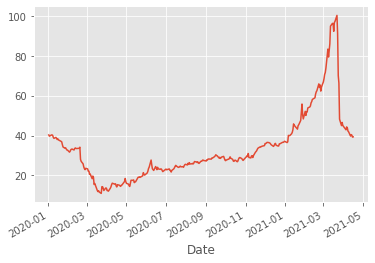

In [ ]:
df['Adj Close'].plot()

In [ ]:
df['100MA'] = df['Adj Close'].rolling(window = 100, min_periods = 0).mean()
df['50MA'] = df['Adj Close'].rolling(window = 50, min_periods = 0).mean()
df['20MA'] = df['Adj Close'].rolling(window = 20, min_periods = 0).mean()



In [ ]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close,100MA,50MA,20MA
Date,,,,,,,,,
2021-04-12,42.680000,39.660000,42.119999,39.770000,59418100.0,39.770000,51.439877,64.516996,64.586499
2021-04-13,41.459999,39.799999,40.340000,40.490002,33145100.0,40.490002,51.528809,64.359494,61.794499
2021-04-14,41.980000,40.180000,40.910000,40.220001,35659100.0,40.220001,51.611178,64.120206,58.993500
2021-04-15,40.669998,38.959999,40.619999,39.250000,34635500.0,39.250000,51.679786,63.902802,56.339000
2021-04-16,39.950001,38.799999,39.299999,39.349998,39989700.0,39.349998,51.742164,63.651498,53.468500


<BarContainer object of 20 artists>

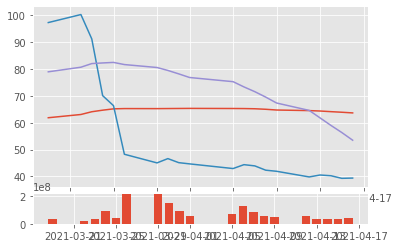

In [ ]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan = 1, colspan = 1)

ax1.plot(df.index[-20:], df['50MA'][-20:])
ax1.plot(df.index[-20:], df['Adj Close'][-20:])
ax1.plot(df.index[-20:], df['20MA'][-20:])
ax2.bar(df.index[-20:], df['Volume'][-20:])

In [ ]:
#resampling - pl. a napi adatokat 10 napivá alakítja

In [ ]:
df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()

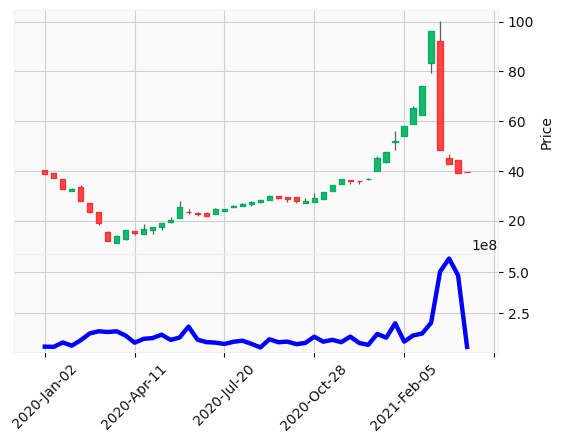

In [ ]:
df_ohlc.columns = df_ohlc.columns.str.capitalize()
df_volume = mpf.make_addplot(df_volume,panel=1,color='b')
mpf.plot(df_ohlc,addplot=df_volume,type='candle',volume=False,figratio=(11,8),figscale=.85,style='yahoo')

In [ ]:
def save_tickers():
  resp = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
  soup = bs.BeautifulSoup(resp.text, "lxml")
  table = soup.find('table', {'class':'wikitable sortable'})
  tickers = []
  for row in table.findAll('tr')[1:]:
    ticker = row.findAll('td')[0].text
    tickers.append(ticker[:-1])

  with open('sp500.pickle', 'wb') as f:
    pickle.dump(tickers, f)

  return tickers

In [ ]:
save_tickers()

['MMM',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALXN',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BLL',
 'BAC',
 'BK',
 'BAX',
 'BDX',
 'BRK.B',
 'BBY',
 'BIO',
 'BIIB',
 'BLK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BF.B',
 'CHRW',
 'COG',
 'CDNS',
 'CZR',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CERN',
 'CF',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA',
 'CAG',
 'COP

In [ ]:
def get_data_from_yahoo(reload_sp500 = False):
  if reload_sp500:
    tickers = save_tickers()
  else:
    with open('sp500.pickle', 'rb') as f:
      tickers = pickle.load(f)
  
  if not os.path.exists('stocks_dfs'):
    os.makedirs('stocks_dfs')

  start = dt.datetime(2021,1,1)
  end = dt.datetime(2021,4,10)

  for ticker in tickers:
    if not os.path.exists('stocks_dfs/{}.csv'.format(ticker)):
      df = web.DataReader(ticker, 'yahoo', start = start, end = end)
      df.to_csv('stocks_dfs/{}.csv'.format(ticker))
    else:
      print('Already have {}'.format(ticker))

In [ ]:
get_data_from_yahoo()

KeyError: ignored

In [ ]:
def compile_data():
  with open("sp500.pickle","rb") as f:
    tickers = pickle.load(f)

  main_df = pd.DataFrame()

  for count,ticker in enumerate(tickers[:10]):
    df = pd.read_csv('stocks_dfs/{}.csv'.format(ticker))
    df.set_index('Date', inplace = True)
    df.rename(columns = {'Adj Close': ticker}, inplace = True)
    df.drop(['Open','High', 'Low', 'Close', 'Volume'], axis = 1, inplace = True)

    if main_df.empty:
      main_df = df
    else:
      main_df = main_df.join(df, how = 'outer')

    if count % 10 == 0:
      print(count)
  print(main_df.head())
  main_df.to_csv('main_df.csv')


In [ ]:
compile_data()

0
                   MMM         ABT  ...         AAP        AES
Date                                ...                       
2021-01-04  170.465271  108.274658  ...  157.123825  23.087158
2021-01-05  170.177643  109.614319  ...  156.954056  23.862030
2021-01-06  172.766312  109.386086  ...  166.021576  24.815714
2021-01-07  168.332855  110.447891  ...  167.439621  24.567358
2021-01-08  165.258179  110.755516  ...  169.826340  25.252821

[5 rows x 10 columns]


In [ ]:
def viz_data():
  df = pd.read_csv('main_df.csv')
  #df['AAP'].plot()
  #plt.show()
  df_corr = df.corr()
  print(df_corr.head())

  data = df_corr.values
  fig = plt.figure()
  ax = fig.add_subplot(111)

  heatmap = ax.pcolor(data, cmap = plt.cm.RdYlGn)
  fig.colorbar(heatmap)

  ax.set_xticks(np.arange(data.shape[1]+0.5), minor = False)
  ax.set_yticks(np.arange(data.shape[0]+0.5), minor = False)

  ax.invert_yaxis()
  ax.xaxis.tick_top()

  column_labels = df_corr.columns
  row_labels = df_corr.index

  ax.set_xticklabels(column_labels)
  ax.set_yticklabels(row_labels)
  plt.xticks(rotation = 90)
  heatmap.set_clim(-1,1)
  plt.tight_layout()
  plt.show()

           MMM       ABT      ABBV  ...       AMD       AAP       AES
MMM   1.000000  0.435634 -0.324507  ... -0.770794  0.669463  0.191744
ABT   0.435634  1.000000 -0.385197  ... -0.215523 -0.105540  0.457511
ABBV -0.324507 -0.385197  1.000000  ...  0.161150  0.110631  0.372758
ABMD -0.494201 -0.024009  0.195255  ...  0.702960 -0.614874 -0.102694
ACN   0.718390  0.097722  0.017945  ... -0.406008  0.794925  0.291125

[5 rows x 10 columns]


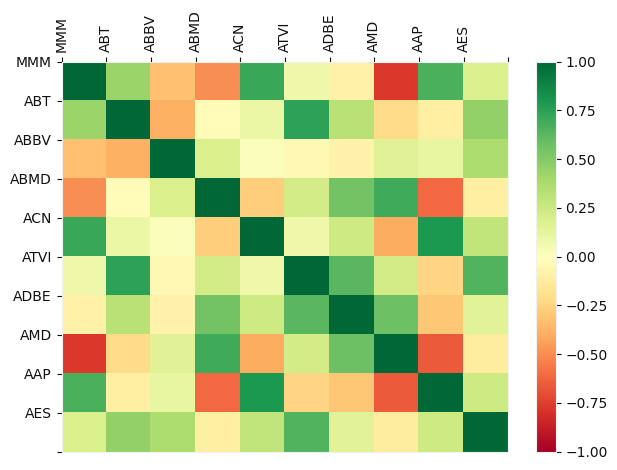

In [ ]:
viz_data()

In [ ]:
def process_data(ticker):
  days = 7
  df = pd.read_csv('main_df.csv', index_col = 0)
  tickers = df.columns.values.tolist()
  df.fillna(0, inplace = True)
  for i in range(1, days+1):
    df['{}_{}d'.format(ticker,i)] = (df[ticker].shift(-1)-df[ticker]) / df[ticker]

  return tickers, df.iloc[:,-7:]

In [ ]:
process_data('MMM')

(['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP', 'AES'],
               MMM_1d    MMM_2d    MMM_3d  ...    MMM_5d    MMM_6d    MMM_7d
 Date                                      ...                              
 2021-01-04 -0.001687 -0.001687 -0.001687  ... -0.001687 -0.001687 -0.001687
 2021-01-05  0.015212  0.015212  0.015212  ...  0.015212  0.015212  0.015212
 2021-01-06 -0.025662 -0.025662 -0.025662  ... -0.025662 -0.025662 -0.025662
 2021-01-07 -0.018265 -0.018265 -0.018265  ... -0.018265 -0.018265 -0.018265
 2021-01-08 -0.008522 -0.008522 -0.008522  ... -0.008522 -0.008522 -0.008522
 ...              ...       ...       ...  ...       ...       ...       ...
 2021-04-05 -0.000667 -0.000667 -0.000667  ... -0.000667 -0.000667 -0.000667
 2021-04-06  0.000565  0.000565  0.000565  ...  0.000565  0.000565  0.000565
 2021-04-07  0.003950  0.003950  0.003950  ...  0.003950  0.003950  0.003950
 2021-04-08  0.011649  0.011649  0.011649  ...  0.011649  0.011649  0.011649